1. Github Link: https://github.com/Amansoni687/CMP7005-Aman-Soni-PRAC1
2. Streamlit Link: https://cmp7005-aman-soni-prac1-kgeqrtncsfbvzszskvwutr.streamlit.app/

#**Task 1: Data Handling**

The main objective of this work was to merge different air quality CSV datasets through Python programming. I applied the os module to dynamically retrieve all files located in the specified dataset folder so the program could automatically process varying numbers of files. The code enabled the reading of each CSV file through a loop to create separate DataFrames by using pandas.read_csv() functions which were then appended to a storage list. I combined all DataFrame objects with pd.concat() after finishing file loading through a process that maintained the merged dataset's continuous index using ignore_index=True. I checked the merging outcome by showing the first few rows of combined data with the .head() function. The output shows that the dataset contains vital temporal attributes including year, month, day, and hour and pollutants consisting of PM2.5, PM10, SO2, NO2, CO, O3 as well as meteorological elements TEMP, PRES, DEWP, RAIN, wd, WSPM together with station identifiers. The merged data provides a clean unified structure which serves two purposes in data exploration and machine learning operations. The process presents efficient data handling practices that fulfill learning outcomes by showing competence in handling files while programming structures and preparing data.










In [ ]:
import os
import pandas as pd

# Define the extraction folder
dataset_folder = '/content/Dataset/Dataset'

# Step 1: List the files inside the 'Dataset' folder
extracted_files = os.listdir(dataset_folder)

# Print the extracted files to check their names
print("Extracted files in 'Dataset' folder:")
print(extracted_files)

# Step 2: Load all the CSV files into a list of dataframes
file_names = extracted_files  # Use the correct list of file names from the extracted folder

# List to hold the dataframes
dfs = []

# Load each file into a dataframe and append it to the list
for file_name in file_names:
    file_path = os.path.join(dataset_folder, file_name)
    dfs.append(pd.read_csv(file_path))

# Step 3: Merge all the dataframes into one
merged_df = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the merged dataframe
merged_df.head()


Extracted files in 'Dataset' folder:
['PRSA_Data_Guanyuan_20130301-20170228.csv', 'PRSA_Data_Changping_20130301-20170228.csv', 'PRSA_Data_Tiantan_20130301-20170228.csv', 'PRSA_Data_Huairou_20130301-20170228.csv', 'PRSA_Data_Dongsi_20130301-20170228.csv', 'PRSA_Data_Nongzhanguan_20130301-20170228.csv', 'PRSA_Data_Dingling_20130301-20170228.csv', 'PRSA_Data_Shunyi_20130301-20170228.csv', 'PRSA_Data_Wanshouxigong_20130301-20170228.csv', 'PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'PRSA_Data_Gucheng_20130301-20170228.csv', 'PRSA_Data_Wanliu_20130301-20170228.csv']


No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7   
1   2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1   
2   3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0  -1.1   
3   4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0  -1.4   
4   5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
2  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
3  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
4  1025.2 -19.5   0.0    N   2.0  Guanyuan

#**Task 2: Exploratory Data Analysis (EDA)**

##1. Fundamental Data Understanding: General Insights about the Data

This task involved a complete first-stage examination of the dataset which provided insight into its architecture and its variable types alongside data quality assessment requirements. A self-built function allowed me to assess essential features of the combined data for subsequent analysis.

As the first step I checked the dataset foundation through the retrieval of column count and row count. The air quality measurements across multiple stations extend for several years across 420,768 rows within the 15-columned dataset. The program printed the data types of every column. The majority of the variables appeared as int64 or float64 types while the date variable achieved proper datetime64 data conversion. The dataset contains continuous variables such as PM2.5 and temperature while it includes categorical variables like wind direction and station ID.

The .head() function retrieved the initial five rows of the data to verify that measured data corresponded to normal ranges. Every record in the dataset includes time-stamped measurements for pollutants including PM2.5, PM10, NO2, CO and environmental characteristics such as temperature, dew point, pressure, wind direction. The observations serve as critical foundation for exploratory evaluation and machine learning prediction models.

Summary statistics about numerical variables became possible through .describe() function application for assessment. Summary statistics obtained through the .describe() function included mean measurements together with standard deviation and minimum value and maximum value and percentile data. The PM2.5 pollution reached its highest level at 241 µg/m³ yet maintained an average of 75.83 µg/m³ indicating possible sharp pollution spikes. NO2 and CO together with different pollutant measures indicate the diverse state of air quality across measurement locations. The temperature measurement spanned the full seasonal range from -19.9 degrees Celsius to 41.6 degrees Celsius throughout the study in Beijing.

The evaluation included assessing total data absences in every database column. The output evaluation showed that the dataset lacks any missing values therefore making imputation and row removal unnecessary throughout preprocessing. The model accuracy improves while the preprocessing becomes simpler because data completeness is maintained at this analysis stage.

The analysis included an exploration of categorical variables to view their unique values as well as randomly selected sample values appeared. The station column contained numerical encoding as its categorical variable but the wind direction (wd) variable remained stored as integers. Modeling preparations can be determined because this information reveals which variables require encoding or transformation steps for the next stage. The number of distinct classes in the dataset becomes essential during the application of one-hot encoding and label encoding because these methods rely on that information.

The fundamental understanding stage resulted in an extensive review of the dataset structure and the identification of key data patterns while ensuring its data quality remains intact. The gathered insights serve as fundamental building blocks to establish both proper data preprocessing methods and model-specific choices that match the dataset profiles.










In [ ]:
import pandas as pd

def fundamental_data_understanding(df):
    # Dataset Info
    print("="*50)
    print("### Dataset Information ###")
    print(f"Number of Rows: {df.shape[0]}")
    print(f"Number of Columns: {df.shape[1]}")
    print(f"Data Types:")
    print(df.dtypes)
    print("="*50)

    # Display the first few rows
    print("### First 5 Rows of the Dataset ###")
    print(df.head())
    print("="*50)

    # Summary Statistics of Numerical Columns
    print("### Summary Statistics of Numerical Columns ###")
    summary_stats = df.describe().T  # Transpose to make it easier to read
    print(summary_stats)
    print("="*50)

    # Missing Values
    print("### Missing Values per Column ###")
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]  # Show only columns with missing values
    if len(missing_values) > 0:
        print(missing_values)
    else:
        print("No missing values in the dataset.")
    print("="*50)

    # Unique Values in Categorical Columns
    print("### Unique Values in Categorical Columns ###")
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        print(f"{col}: {df[col].nunique()} unique values")
        print(f"Sample values in '{col}': {df[col].unique()[:5]}...")
        print("-" * 50)

fundamental_data_understanding(merged_df)


### Dataset Information ###
Number of Rows: 420768
Number of Columns: 15
Data Types:
hour                int64
PM2.5             float64
PM10              float64
SO2               float64
NO2               float64
CO                float64
O3                float64
TEMP              float64
PRES              float64
DEWP              float64
RAIN              float64
wd                  int64
WSPM              float64
station             int64
date       datetime64[ns]
dtype: object
### First 5 Rows of the Dataset ###
   hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN  wd  \
0     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7  1023.0 -18.8   0.0   6   
1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1  1023.2 -18.2   0.0   3   
2     2    3.0   3.0  10.0  19.0  300.0  69.0  -1.1  1023.5 -18.2   0.0   6   
3     3    3.0   6.0   7.0  24.0  400.0  62.0  -1.4  1024.5 -19.4   0.0   7   
4     4    3.0   6.0   5.0  14.0  400.0  71.0  -2.0  1025.2 -19.5   0.0   3   



##2. Data Preprocessing: Handling Missing Values, Duplicates, Feature Engineering

I designed a controlled data preprocessing system that cleaned up and prepared the merged air quality dataset before machine learning analysis. A traditional data preprocessing technique addressed variables through best practices to resolve quality problems and generate new features and perform transformations for modeling compatibility.

As a starting point I performed a split between numeric and categoric variables to handle missing data. Values in numerical variables were substituted with the mean values from their corresponding columns. The most common value known as the mode was chosen to complete missing data entries for categorical variables. Since the dataset shows temporal characteristics the procedure maintains data integrity while preserving useful records.

Through drop_duplicates(), I deleted duplicate entries from the data set so that statistical distributions and potential biases would not be affected. The modification process elevates both the quality and reliability standards of the complete dataset.

I generated a new date field through pd.to_datetime() after applying feature engineering to unite year, month, and day values. The data transformation enables better time-oriented analysis such as forecasting and seasonal pattern detection which helps researchers and practitioners. The process removed the individual columns later on to reduce data redundancy and achieve data simplification.

I specifically handled outliers on the PM2.5 pollutant variable to reduce its extreme value effects. The data points exceeding 1.5 times the IQR distance from the first and third quartiles underwent clipping to their nearest bound points through the IQR method. The technique conserves the main distribution patterns of the data by cutting down outlier impacts that can skew training models and prediction results.

The process included converting non-numeric columns to numerical format through categorical encoding. The Scikit-learn LabelEncoder converted wd (wind direction) and station column values into numeric format for machine learning models requiring numeric features. The data requirements for modeling become obtainable through this transformation process.

I removed redundant columns comprising the No index variable alongside day month and year components since their information was incorporated into the date field. The reduction of data complexity serves as a solution to prevent multicollinearity problems that could occur in future analyses.

Through the preprocessing phase the dataset obtained effective cleaning while resolving inconsistencies then creating new features with numerical values from categorical data. These data enhancement improvements strengthen the data quality while improving model performance and support the Learning Outcomes LO3 and LO4 regarding suitable pre-processing methods for real datasets.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def data_preprocessing(df):

    # Step 1: Handle Missing Values
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in num_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mean(), inplace=True)

    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)

    # Step 2: Remove Duplicate Rows
    df.drop_duplicates(inplace=True)

    # Step 3: Feature Engineering - Create 'date' column from year, month, and day
    if 'year' in df.columns and 'month' in df.columns and 'day' in df.columns:
        df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

    # Step 4: Handle Outliers
    if 'PM2.5' in df.columns:
        Q1 = df['PM2.5'].quantile(0.25)
        Q3 = df['PM2.5'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df['PM2.5'] = np.where(df['PM2.5'] < lower_bound, lower_bound, df['PM2.5'])
        df['PM2.5'] = np.where(df['PM2.5'] > upper_bound, upper_bound, df['PM2.5'])

    # Step 5: Encoding Categorical Data
    label_encoder = LabelEncoder()

    if 'wd' in df.columns:
        df['wd'] = label_encoder.fit_transform(df['wd'])
    if 'station' in df.columns:
        df['station'] = label_encoder.fit_transform(df['station'])

    # Step 6: Drop Unnecessary Columns
    if 'No' in df.columns:
        df.drop(['No'], axis=1, inplace=True)
    if 'year' in df.columns and 'month' in df.columns and 'day' in df.columns:
        df.drop(['year', 'month', 'day'], axis=1, inplace=True)

    # Final Message
    print("\nData Preprocessing Completed.")
    return df

merged_df = data_preprocessing(merged_df)



Data Preprocessing Completed.


## 3. Statistics/Computation-based Analysis and Visualization

Through Exploratory Data Analysis (EDA) I deployed univariate and bivariate together with multivariate statistical visualizations for discovering relationships and structural properties of variables present within the air quality dataset. Data-driven pattern recognition can be achieved through visual inspections which help developers make data-oriented decisions for model development.

For the univariate analysis I produced distribution observations through histograms that displayed the graphical characteristics of PM2.5, PM10, CO, NO2, TEMP and WSPM numerical data points. PM2.5 and PM10 follow a skewed distribution pattern that reflects how fewer observations occur at very high pollution levels when compared to typical measurements. The heavy skewness of CO and SO2 variables concentrated their values at lower sections that indicated their instances of lower concentration during most hours of the day. The distributions of TEMP and PRES variables displayed a natural bell-shaped or symmetrical pattern. The evaluation step identified unbalanced distributions along with data skewness while examining any necessary transformation needs. The frequency distribution patterns of categories were analyzed through bar plots for different variables including wd and encoded station.

The box plot showed PM2.5 level relationships between different monitoring stations during bivariate analysis. The visual representation showed both location-based pollution differences and frequent outliers detected throughout the monitoring stations when measuring PM2.5 concentrations. The median measured at each station across the city maintained stability but variability in both spread and outliers suggested geographical and environmental effects on air pollution levels.

I generated a correlation matrix heatmap that showed the Pearson interrelations among numerical measurement variables. The analysis revealed clear positive correlations between the PM2.5 and PM10 (0.84), PM2.5 and CO (0.74) measurements since the pollutants tend to rise simultaneously. The meteorological variables apresent strong negative correlation pattern with PRES suggesting their seasonal behaviors move in an opposite direction. This qualitative information helps researchers determine which variables to exclude while choosing suitable features for modeling and it also shows that the variables are interconnected through multicollinearity.

The analysis used pairplots to show distributions together with scatterplots of all numeric variable pairs in multivariate analysis. The broad examination allowed me to discover noticeable patterns and observe logical and non-logical relationships between variables. Pairwise plots confirmed previous results by showing the consistent relationship between PM2.5 and PM10 and between NO2 and CO which indicates combined pollution sources or meteorological influences. Some detected relationships showed evidence of non-linearity and distribution difficulties so alternative modeling techniques became necessary.

The association between variable behavior patterns and relationships became clear by using statistical plots alongside correlation analysis. The visualizations verified data quality along with variability through which researchers could make informed choices for feature selection while also determining scaling procedures and selecting models that matched Learning Outcomes LO3 and LO4 regarding critical data analysis technique application and evaluation.

### Univariate Analysis ###

### Plotting Histograms for Numerical Columns ###


### Bivariate Analysis ###

### Boxplot for PM2.5 Across Different Stations ###


<ipython-input-20-448d09228911>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='station', y='PM2.5', data=df, palette='Set3')


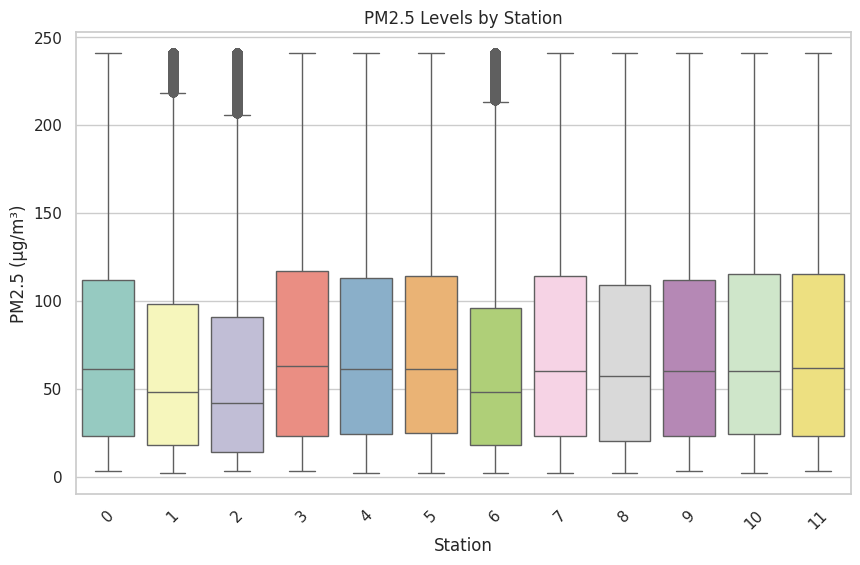


### Correlation Heatmap ###


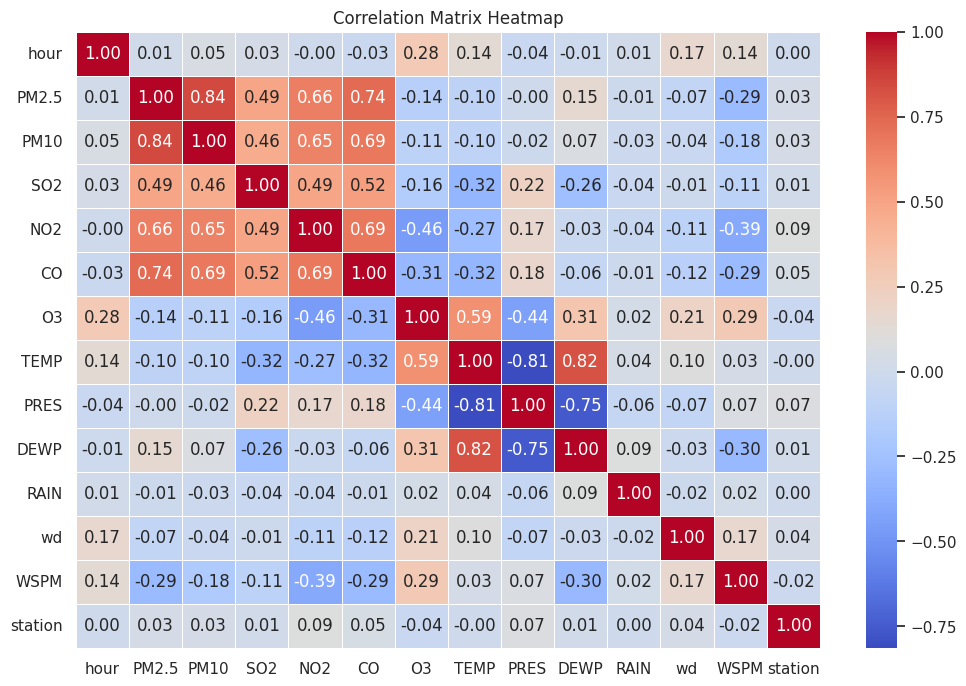

### Multivariate Analysis ###

### Pairplot for Numerical Columns ###


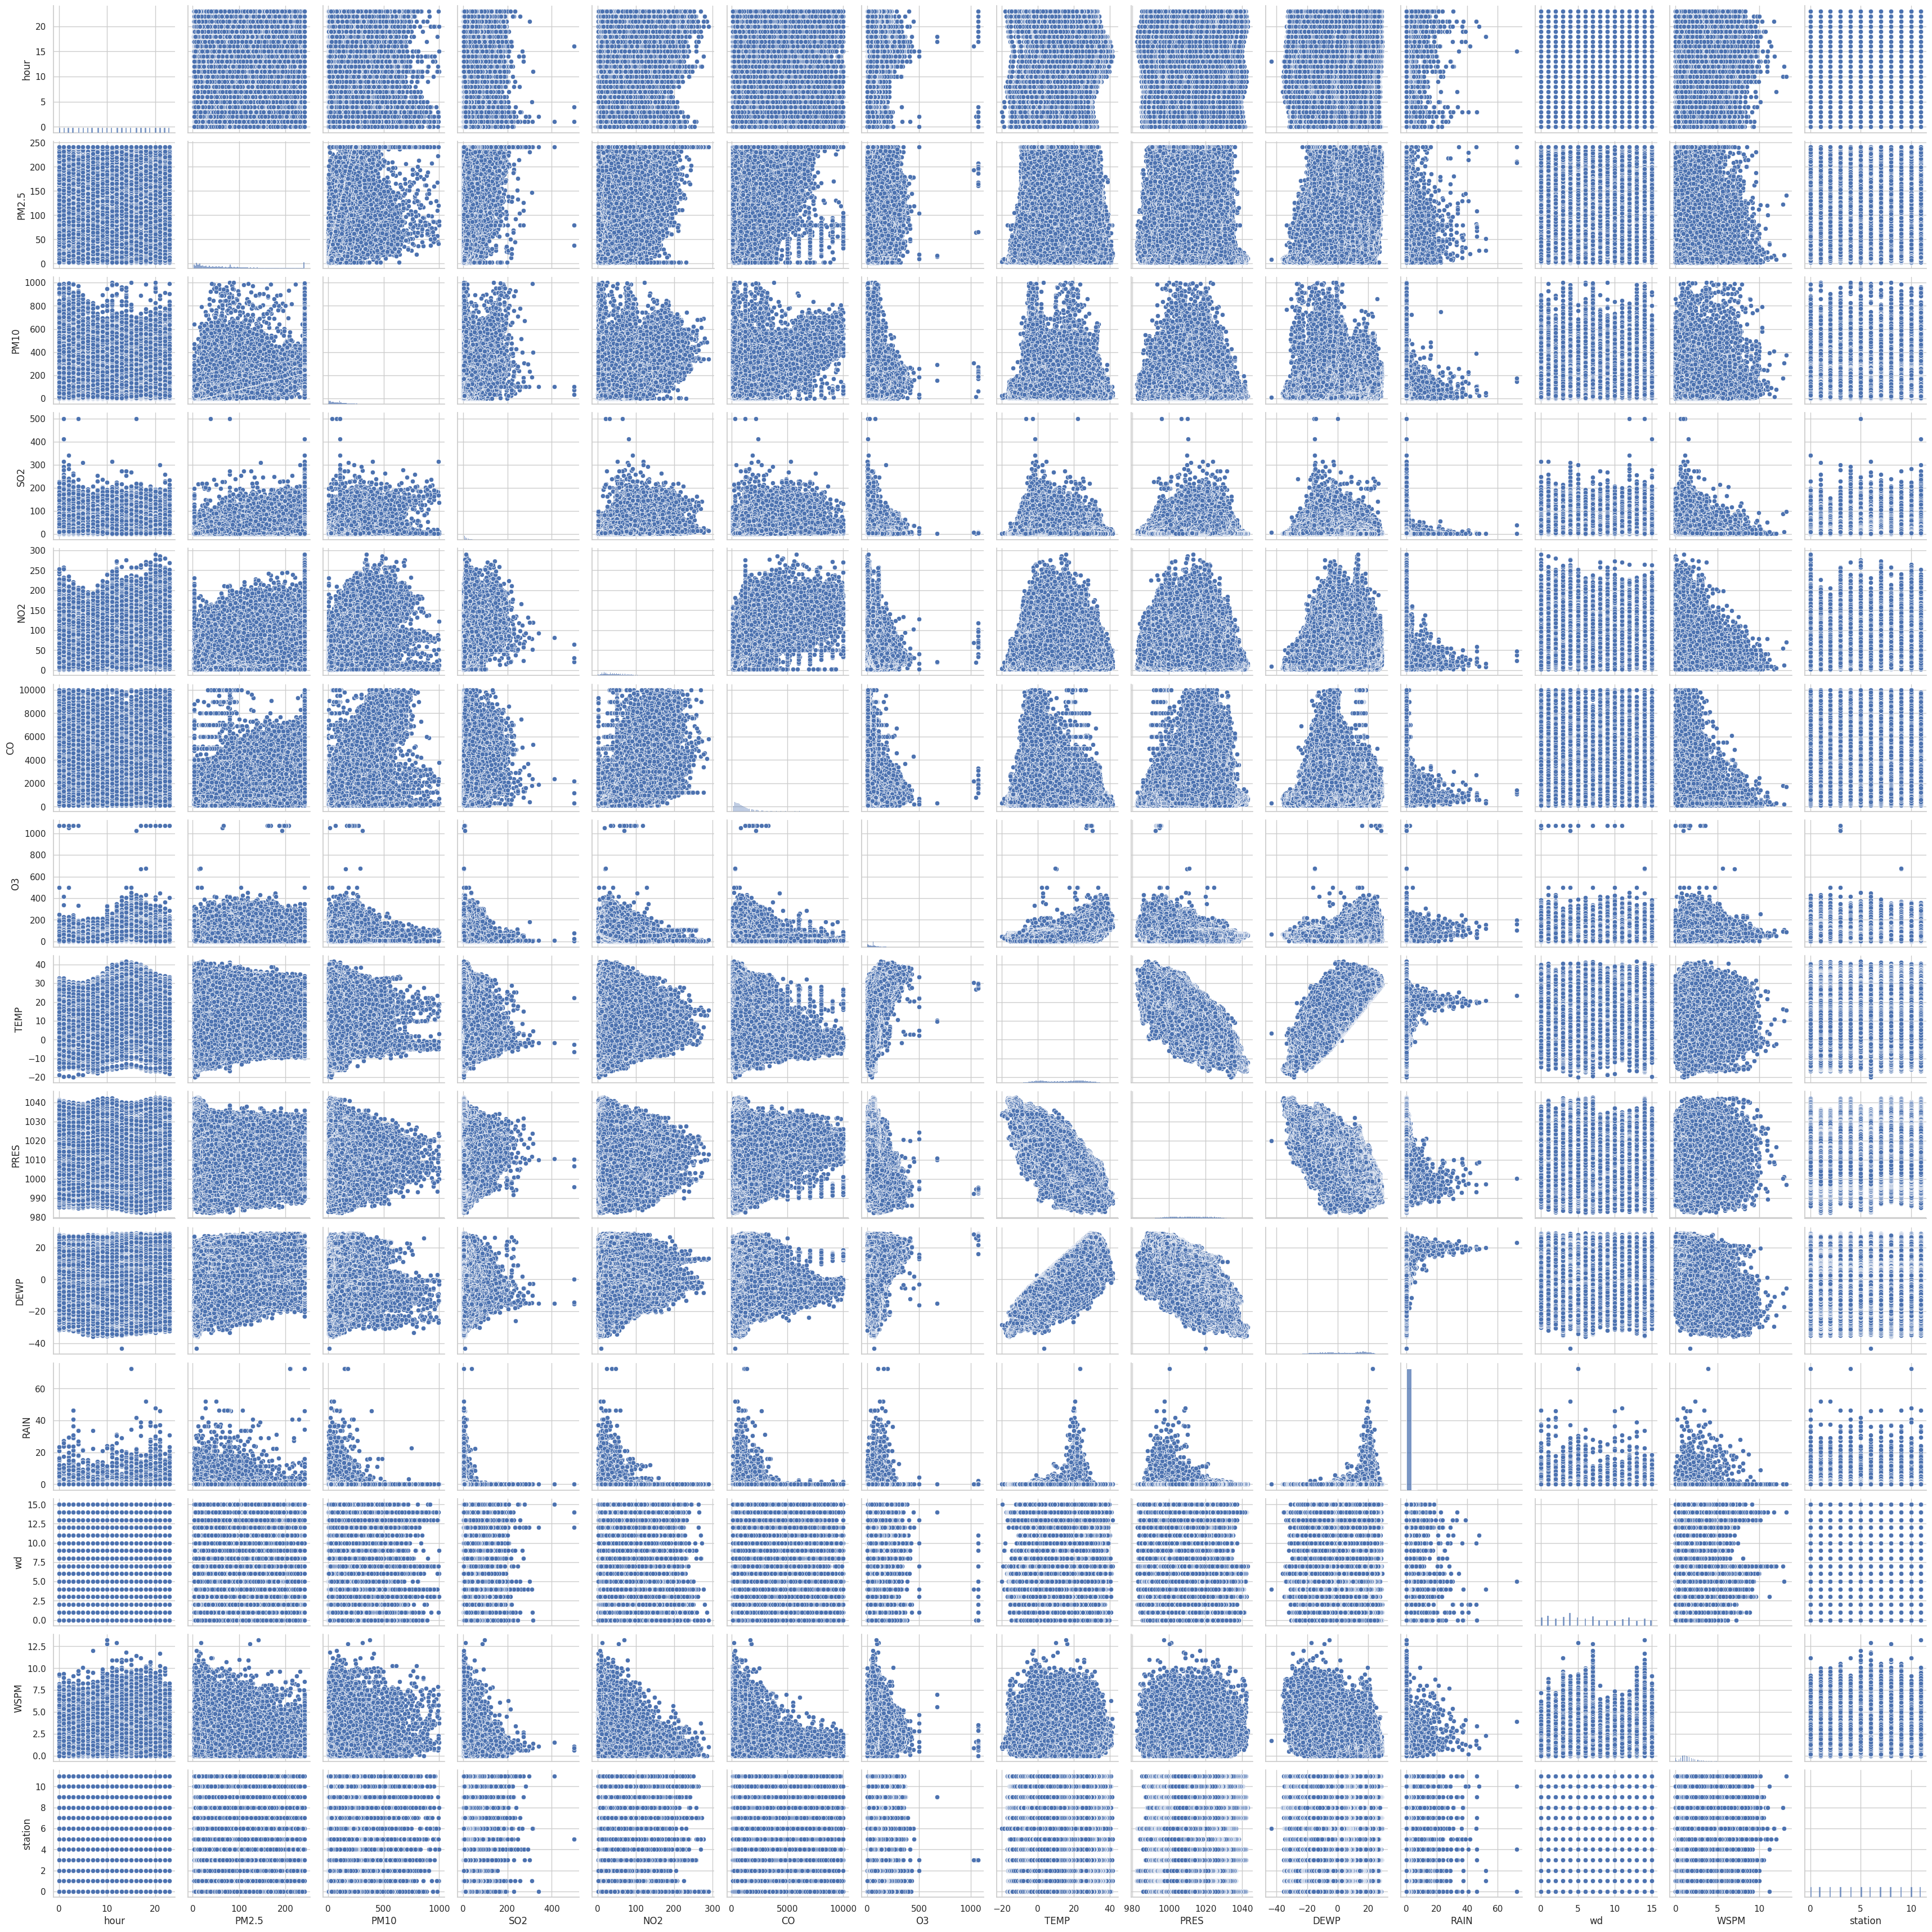

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def statistics_and_visualization(df):

    # Set the figure size for all plots
    sns.set(style="whitegrid")

    # Univariate Analysis
    print("="*50)
    print("### Univariate Analysis ###")

    # Histograms for numerical columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    print("\n### Plotting Histograms for Numerical Columns ###")
    fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, 6 * len(numerical_cols)))
    if len(numerical_cols) == 1:
        axes = [axes]

    for i, col in enumerate(numerical_cols):
        axes[i].hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Bar plots for categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        print("\n### Plotting Bar Plots for Categorical Columns ###")
        fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, 6 * len(categorical_cols)))
        if len(categorical_cols) == 1:
            axes = [axes]

        for i, col in enumerate(categorical_cols):
            sns.countplot(x=df[col], ax=axes[i], palette='Set2')
            axes[i].set_title(f"Count Plot of {col}")
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Count')
            axes[i].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

    # Bivariate Analysis
    print("="*50)
    print("### Bivariate Analysis ###")

    # Box plot for PM2.5 across different stations (categorical variable)
    if 'station' in df.columns:
        print("\n### Boxplot for PM2.5 Across Different Stations ###")
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='station', y='PM2.5', data=df, palette='Set3')
        plt.title('PM2.5 Levels by Station')
        plt.xlabel('Station')
        plt.ylabel('PM2.5 (µg/m³)')
        plt.xticks(rotation=45)
        plt.show()

    # Correlation between numerical columns
    print("\n### Correlation Heatmap ###")
    correlation_matrix = df[numerical_cols].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

    # Multivariate Analysis
    print("="*50)
    print("### Multivariate Analysis ###")

    # Pairplot for numerical columns
    print("\n### Pairplot for Numerical Columns ###")
    sns.pairplot(df[numerical_cols].dropna())
    plt.show()

statistics_and_visualization(merged_df)


#**Task 3: Model Building**

I developed a supervised machine learning system to forecast PM2.5 concentrations by processing the preprocessed air quality dataset. I implemented Random Forest Regressor inside a full pipeline that combined data preprocessing with model training evaluation while performing tuning steps.

The initial step required me to split PM2.5 from other variables followed by an 80/20 split for evaluating model predictive abilities. I divided numerical columns from categorical ones before developing StandardScaler pipelines for numerical data and assigning OneHotEncoder pipelines to categorical data. A ColumnTransformer assembled all the preprocessors to guarantee proper transformation of various data types throughout the modeling process.

The main predictive model used Random Forest Regressor because it simultaneously maintains excellent robustness alongside its ability to solve complex non-linear data and its resistance to overfitting. A Pipeline containing model preprocessing was created because it creates modular and prevent data leakage throughout cross-validation and hyperparameter tuning operations. The model demonstrated excellent performance on the test data once trained as it produced an R² score of 0.9324 and MAE measurement of 10.84 and RMSE value of 17.37. The predictive accuracy of these metrics demonstrates exceptional strength because the error limits stay minimal.

The visual confirmation of model accuracy showed that the majority of predicted PM2.5 values aligned closely with the ideal red reference line that reflects actual values in the plot. This indicates the model effectively represents the underlying data relationship. The residuals distribution showed a normal pattern around zero which indicates that model errors exist as unbiased random distributions making this a favorable trait in regression modeling.

The R² average score reached 0.9187 during 5-fold cross-validation validation revealing that the model demonstrates stable performance when applied to distinct subdivisions of data sets.

The model reached further performance optimization through GridSearchCV hyperparameter tuning where I tested different values of n_estimators with max_depth and min_samples_split. The selection of the superior configuration included n_estimators=200 alongside max_depth=None and min_samples_split=2. The refined parameter set in the model produced improved statistics where the R² score became 0.9328 while MAE dropped to 10.81 and RMSE settled at 17.31.

The visual representation showed the predictions of the optimized model adjacent to actual PM2.5 measurement points. I determined both accuracy and reliability of predictions through observing how tightly predicted values clustered along the reference trend line while displayed in the scatterplot.

This model development followed a complete machine learning framework that included thorough data preprocessing along with sound evaluation methods as well as optimal optimization approaches. The process shows mastery in choosing appropriate algorithms along with proper application of parameter adjustment and interpretation of quantitative along with visual model diagnostic metrics. The assessment of machine learning solutions using real-world data matches directly with the learning outcomes that focus on development (LO3) and evaluation (LO4).


### Model Evaluation (Initial Model) ###
R² Score: 0.9324
MAE: 10.84
MSE: 301.81
RMSE: 17.37


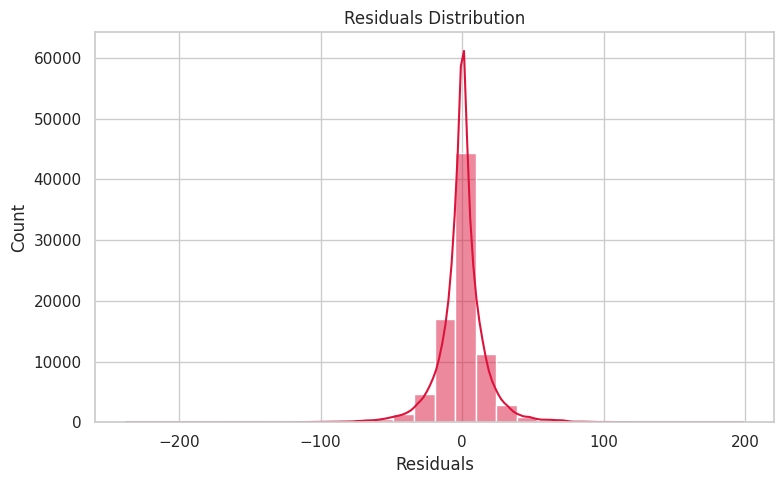

### Cross-validation Scores (5-Fold) ###
R² scores: [0.92394325 0.92745426 0.92542702 0.90776381 0.90894051]
Mean R²: 0.9187057705113373
### Hyperparameter Tuning with GridSearchCV ###
Best Parameters: {'regressor__max_depth': None, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
### Evaluation of Tuned Model ###
R² Score: 0.9328
MAE: 10.81
MSE: 299.76
RMSE: 17.31


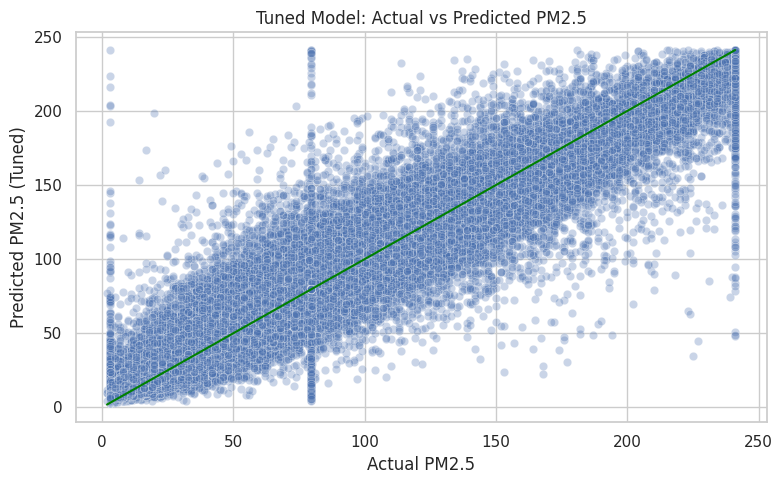

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def model_building(df, target_column):

    # Step 1: Define Features and Target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Step 2: Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    # Step 3: Column Classification
    numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

    # Step 4: Preprocessing Pipelines
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Step 5: Pipeline + Random Forest Regressor
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ])

    # Step 6: Fit Model
    pipeline.fit(X_train, y_train)

    # Step 7: Predict
    y_pred = pipeline.predict(X_test)

    # Step 8: Evaluation
    print("="*50)
    print("### Model Evaluation (Initial Model) ###")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

    # Step 9: Plot - Actual vs Predicted
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
    plt.xlabel('Actual PM2.5')
    plt.ylabel('Predicted PM2.5')
    plt.title('Actual vs Predicted PM2.5')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Step 10: Residual Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, kde=True, bins=30, color='crimson')
    plt.title('Residuals Distribution')
    plt.xlabel('Residuals')
    plt.tight_layout()
    plt.show()

    # Step 11: Cross-validation
    print("="*50)
    print("### Cross-validation Scores (5-Fold) ###")
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    print("R² scores:", cv_scores)
    print("Mean R²:", np.mean(cv_scores))

    # Step 12: Hyperparameter Tuning (GridSearchCV)
    print("="*50)
    print("### Hyperparameter Tuning with GridSearchCV ###")
    param_grid = {
        'regressor__n_estimators': [100, 200],
        'regressor__max_depth': [10, 20, None],
        'regressor__min_samples_split': [2, 5]
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("Best Parameters:", grid_search.best_params_)

    # Step 13: Evaluate Tuned Model
    y_pred_best = grid_search.predict(X_test)

    print("="*50)
    print("### Evaluation of Tuned Model ###")
    print(f"R² Score: {r2_score(y_test, y_pred_best):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_best):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred_best):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best)):.2f}")

    # Step 14: Final Plot
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.3)
    plt.xlabel('Actual PM2.5')
    plt.ylabel('Predicted PM2.5 (Tuned)')
    plt.title('Tuned Model: Actual vs Predicted PM2.5')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

model_building(merged_df, target_column='PM2.5')


#**Task 4: Application Development**

https://cmp7005-aman-soni-prac1-kgeqrtncsfbvzszskvwutr.streamlit.app/

#**Task 5: Version Control**

image.png

#**Task 6: Self-Reflection**

The original start of my project ended in failure because poor time organization combined with unexpected challenges interrupted my work process. The project delivery failure demonstrated an important weakness within my project design process. This experience taught me the essential role of planning realistic ambitions together with dividing longer projects into smaller segments which includes precise completion times along with routine evaluation points. I chose to reshape my work method by implementing planned schedule planning alongside beginning tasks early and continuously checking progress. These new methods led to better work quality together with enhanced deadline completion ability.

The data preprocessing steps became a major success point during my reassessment period. I made a systematic plan to handle missing values and duplicates and to address outliers through a statistical approach using interquartile range (IQR) methodology. My data collection methods led to better dataset integrity while making my data ready for reliable analysis and effective modeling. The graphical analysis in my exploratory data analysis (EDA) transformed through my use of different visualization tools which included charts and distributions like histograms and boxplots together with heatmaps and pair plots. The visual tools disclosed concealed patterns within my data which helped me share findings clearly to both my audience and those who depend on my insights.

Significant time went into developing the Streamlit application through a more user-friendly and visually enhanced user interface design. The experience taught me about the essential role UX principles play for successful communication of complex analytical outcomes to users. The application gained functionality along with better user-friendliness through the structured organization of its sections into data overview, EDA and modeling. The modular approach I used during development isolated problems while helping maintainability of the code.

